In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
!pip install keras 

In [3]:
!pip install tensorflow

# Problem_Statement:
The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

# _Importing_data and EDA_Visualization_

In [8]:
d1 = pd.read_csv('https://raw.githubusercontent.com/Kabirrrrrrr/Datasets/main/gas_turbines.csv.crdownload')
d1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
8742,9.7038,1012.8,75.201,5.3518,32.582,1100.2,528.99,161.85,14.067,1.7523,72.642
8743,9.4282,1013.0,74.992,5.2645,32.208,1099.9,530.53,161.22,13.810,2.1326,74.305
8744,9.0291,1012.8,76.270,5.4282,33.271,1100.0,526.91,163.63,14.133,2.1054,72.240
8745,8.6401,1012.6,78.721,4.5035,26.698,1089.4,542.90,143.81,12.509,2.2081,80.324


In [9]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8747 entries, 0 to 8746
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      8747 non-null   float64
 1   AP      8747 non-null   float64
 2   AH      8747 non-null   float64
 3   AFDP    8747 non-null   float64
 4   GTEP    8747 non-null   float64
 5   TIT     8747 non-null   float64
 6   TAT     8746 non-null   float64
 7   TEY     8746 non-null   float64
 8   CDP     8746 non-null   float64
 9   CO      8746 non-null   float64
 10  NOX     8746 non-null   float64
dtypes: float64(11)
memory usage: 751.8 KB


In [10]:
d1.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,8747.000000,8747.000000,8747.000000,8747.000000,8747.000000,8747.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000
mean,17.182094,1012.732826,79.700376,4.313804,25.488911,1083.819721,545.556986,134.353302,12.098511,2.172577,69.467221
std,7.901290,6.367242,13.656998,0.804405,4.135594,19.931362,8.026067,15.759426,1.085672,2.373330,10.100859
min,0.522300,985.850000,30.344000,2.087400,18.100000,1.000000,513.060000,101.150000,9.928600,0.000388,41.777000
25%,10.201000,1008.700000,70.656000,3.873000,23.487500,1082.600000,544.622500,131.765000,11.710000,0.961252,63.174000
50%,17.541000,1012.600000,82.964000,4.290400,25.193000,1088.900000,549.910000,133.790000,12.035000,1.523200,67.938000
75%,23.550000,1016.500000,90.378500,4.741550,26.602500,1094.600000,550.070000,135.630000,12.348000,2.486400,74.717500
max,34.929000,1031.800000,100.200000,7.610600,37.402000,1100.800000,550.530000,174.610000,15.081000,44.103000,119.890000


In [11]:
d1.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [12]:
d1.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     1
TEY     1
CDP     1
CO      1
NOX     1
dtype: int64

C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TEY'>

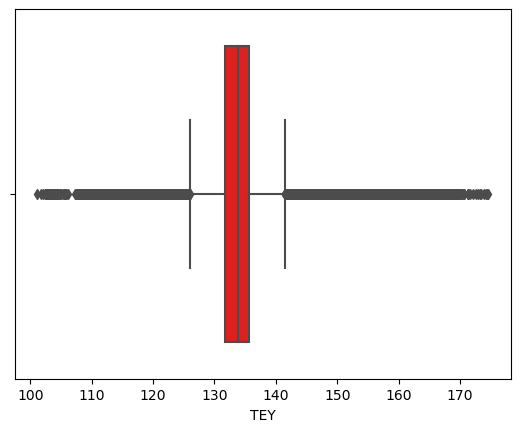

In [13]:
sns.boxplot(d1['TEY'], color = 'red')

In [14]:
X = data.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= data.loc[:,['TEY']]

In [15]:
scaled = StandardScaler()
X = scaled.fit_transform(X)
y = scaled.fit_transform(y)

# _Building_Model and Applying_Keras_

In [17]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [19]:
import keras
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

C:\Users\Prajwal\AppData\Local\Temp\ipykernel_14508\1991303876.py:6: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)


Results: nan (nan) MSE


In [20]:
estimator.fit(X, y)
prediction = estimator.predict(X)
prediction

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [22]:
estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)

In [23]:
prediction

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

In [24]:
X = data.drop(columns = ['TEY'], axis = 1) 
y = data.iloc[:,7]

In [25]:
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled

array([[ 1.45457894e+00, -1.18216752e+00,  2.18174944e-01, ...,
        -1.02469236e-01, -4.20286348e-01, -1.53003243e+00],
       [ 4.16469171e-01, -2.18890094e-02,  2.05719259e-01, ...,
        -1.54252155e+00,  1.41960029e+00, -9.07653361e-01],
       [ 2.14794986e+00, -2.37369305e-01, -2.67444074e+00, ...,
         3.87111532e-01,  1.89333028e-01,  1.49108899e+00],
       ...,
       [ 1.65226341e-03, -3.43310784e+00, -1.04332529e+00, ...,
        -2.14452739e-01, -4.13647831e-01,  7.46229365e-01],
       [ 1.08422016e+00, -6.51754489e-01,  9.21269418e-01, ...,
         5.57884415e-02, -2.93083781e-01, -1.23242441e+00],
       [-9.59321402e-01,  2.93043730e-01,  1.60096690e-01, ...,
         2.70984532e-02, -2.84089660e-01,  8.88958733e-01]])

In [26]:
import tensorflow as tf
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                               tf.keras.layers.Dense(output_size)
                             ])

In [27]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])

In [28]:
num_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/100
222/222 - 2s - loss: 4904.7485 - mean_squared_error: 4904.7485 - val_loss: 348.1867 - val_mean_squared_error: 348.1867 - 2s/epoch - 9ms/step
Epoch 2/100
222/222 - 1s - loss: 215.9266 - mean_squared_error: 215.9266 - val_loss: 164.7282 - val_mean_squared_error: 164.7282 - 683ms/epoch - 3ms/step
Epoch 3/100
222/222 - 1s - loss: 104.9619 - mean_squared_error: 104.9619 - val_loss: 90.1650 - val_mean_squared_error: 90.1650 - 627ms/epoch - 3ms/step
Epoch 4/100
222/222 - 1s - loss: 56.2912 - mean_squared_error: 56.2912 - val_loss: 46.1051 - val_mean_squared_error: 46.1051 - 581ms/epoch - 3ms/step
Epoch 5/100
222/222 - 1s - loss: 31.5312 - mean_squared_error: 31.5312 - val_loss: 24.7087 - val_mean_squared_error: 24.7087 - 637ms/epoch - 3ms/step
Epoch 6/100
222/222 - 1s - loss: 18.9024 - mean_squared_error: 18.9024 - val_loss: 18.1560 - val_mean_squared_error: 18.1560 - 663ms/epoch - 3ms/step
Epoch 7/100
222/222 - 1s - loss: 12.4884 - mean_squared_error: 12.4884 - val_loss: 11.6937 

In [29]:
test_loss, mean_squared_error = model.evaluate(X_test_scaled, y_test)

28/28 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan    


In [33]:
predictions = model.predict_on_batch(X_test_scaled)

In [34]:
predictions = model.predict_on_batch(X_test_scaled)

In [35]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,133.89,129.178284,3.519095
1,108.74,123.957451,13.994345
2,134.16,129.236298,3.670023
3,109.97,126.009109,14.584986
4,129.14,130.859238,1.331298
...,...,...,...
870,111.79,125.972946,12.687133
871,132.97,132.965500,0.003384
872,133.71,132.225800,1.110015
873,134.12,130.280121,2.863018
